# Import Library

In [ ]:
!pip install plotly
!pip install pythainlp
!pip install pycrfsuite

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

import plotly.express as px

import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Download Dataset

In [ ]:
!gdown --id 148vJ_8Tjoh-HZAuHBg_a5x0ebveoL_Mf

Downloading...
From: https://drive.google.com/uc?id=148vJ_8Tjoh-HZAuHBg_a5x0ebveoL_Mf
To: /content/AIFORTHAI-LST20Corpus.tar.gz
100% 13.6M/13.6M [00:00<00:00, 15.0MB/s]


In [ ]:
!tar -xvf /content/AIFORTHAI-LST20Corpus.tar.gz

In [ ]:
train_files = glob.glob('/content/LST20_Corpus/train/*')

In [ ]:
%%time

column_names = ['word', 'a', 'b', 'c']
df = pd.DataFrame(columns=column_names)
for file_path in train_files:

    new_df = pd.read_csv(train_files[1], header=None, sep='\t', names=column_names)
    df = pd.concat([df, new_df])

In [ ]:
df.reset_index(inplace=True)

# Data Visualization

In [ ]:
df.head()

,index,word,a,b,c
0,0,โรส,NN,B_ORG,B_CLS
1,1,_,PU,I_ORG,I_CLS
2,2,มีเดีย,NN,I_ORG,I_CLS
3,3,ฯ,PU,E_ORG,I_CLS
4,4,_,PU,O,I_CLS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   word        0 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [ ]:
df.describe(include=np.object)

,word,a,b,c
count,5053608,5053608,5053608,5053608
unique,355,13,20,4
top,_,NN,O,I_CLS
freq,827092,1441720,4586946,4120284


In [ ]:
copy_df = df.copy()
for each in copy_df[3:]:
    copy_df[each] = copy_df[each].apply(lambda x : str(x).strip())

In [ ]:
copy_df

,index,word,a,b,c
0,0,โรส,NN,B_ORG,B_CLS
1,1,_,PU,I_ORG,I_CLS
2,2,มีเดีย,NN,I_ORG,I_CLS
3,3,ฯ,PU,E_ORG,I_CLS
4,4,_,PU,O,I_CLS
...,...,...,...,...,...
5053603,1327,เมื่อ,PS,O,I_CLS
5053604,1328,ถึง,CC,O,I_CLS
5053605,1329,สิ้น,NN,O,I_CLS
5053606,1330,ปี,NN,O,I_CLS


In [ ]:
copy_df['a'].value_counts()

NN    1441720
VV     978852
PU     925736
CC     451486
PS     269374
FX     223846
AX     220052
NU     193494
AV     128996
CL     102438
PR      41734
AJ      41734
NG      34146
Name: a, dtype: int64

In [ ]:
copy_df.isnull().sum()

index    0
word     0
a        0
b        0
c        0
dtype: int64

In [ ]:
copy_df

,index,word,a,b,c
0,0,โรส,NN,B_ORG,B_CLS
1,1,_,PU,I_ORG,I_CLS
2,2,มีเดีย,NN,I_ORG,I_CLS
3,3,ฯ,PU,E_ORG,I_CLS
4,4,_,PU,O,I_CLS
...,...,...,...,...,...
5053603,1327,เมื่อ,PS,O,I_CLS
5053604,1328,ถึง,CC,O,I_CLS
5053605,1329,สิ้น,NN,O,I_CLS
5053606,1330,ปี,NN,O,I_CLS


In [ ]:
copy_df[:100000].to_csv('save.csv', index=False)

In [ ]:
pos_ = copy_df['a'].unique()
fig = px.histogram(copy_df, x="a", category_orders=dict(a=pos_))
fig.show()

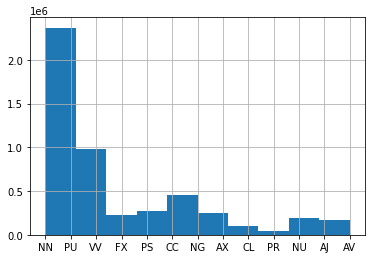

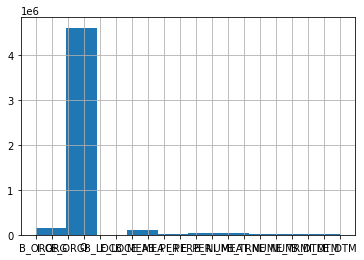

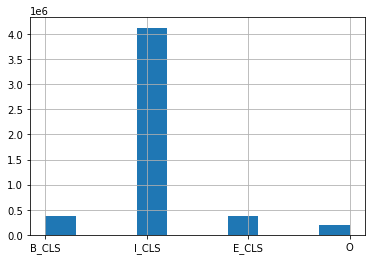

In [ ]:
for col in copy_df.columns[2:]:
    copy_df[col].hist()
    plt.show()

## Word Cloud

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

import matplotlib as mpl

mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
def plotWordCloud(column_name, thai_option = False):
    text = " ".join(cat for cat in copy_df[column_name].tolist())
    if thai_option:
        wordcloud = WordCloud(
                        # font_path='THSarabunNew.ttf',
                        background_color="white",
                        width=1024, # กว้าง
                        height=768, # ยาว
                        ).generate(text)
    else:
        wordcloud = WordCloud(
                            font_path='THSarabunChula-Regular.ttf',
                            background_color="white",
                            width=1024, # กว้าง
                            height=768, # ยาว
                            ).generate(text)
 
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.title(column_name)
    plt.axis("off")
    plt.show()

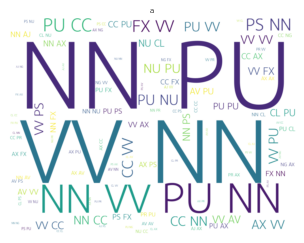

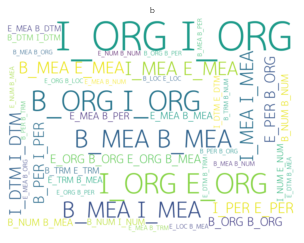

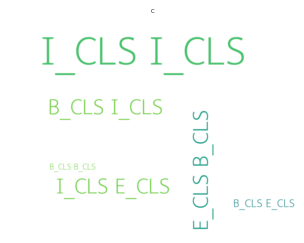

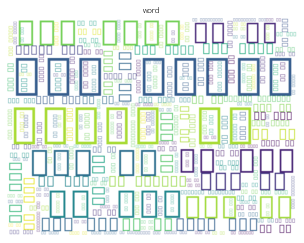

In [ ]:
plotWordCloud('a')
plotWordCloud('b')
plotWordCloud('c')
plotWordCloud('word', thai_option=True)